# РУБЕЖНЫЙ КОНТРОЛЬ

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились. За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить преподавателю. За прохождение определенного порога будут начисляться баллы.

# Метрика

Для оценки решения задачи применяется стандартная для задачи классификации метрика ROC-AUC. Ее можно вычислить используя предсказанные вероятности и истинные классы без конкретного порога классификации, а также она работает даже если классы в данных сильно несбалансированны. Метрика считается следующим образом: 


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt

## Загрузка данных (5 баллов)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
df = pd.read_csv('train_churn.csv')

In [5]:
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
df.shape

(5282, 20)

In [7]:
df.isnull().value_counts()

ClientPeriod  MonthlySpending  TotalSpent  Sex    IsSeniorCitizen  HasPartner  HasChild  HasPhoneService  HasMultiplePhoneNumbers  HasInternetService  HasOnlineSecurityService  HasOnlineBackup  HasDeviceProtection  HasTechSupportAccess  HasOnlineTV  HasMovieSubscription  HasContractPhone  IsBillingPaperless  PaymentMethod  Churn
False         False            False       False  False            False       False     False            False                    False               False                     False            False                False                 False        False                 False             False               False          False    5282
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (5 баллов)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

In [47]:
#численные признаки
feat = df[['ClientPeriod', 'MonthlySpending', 'TotalSpent']]

In [48]:
feat.head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.2
2,1,75.90,75.9
3,32,79.30,2570
4,60,115.25,6758.45


array([[<AxesSubplot:title={'center':'ClientPeriod'}>,
        <AxesSubplot:title={'center':'MonthlySpending'}>]], dtype=object)

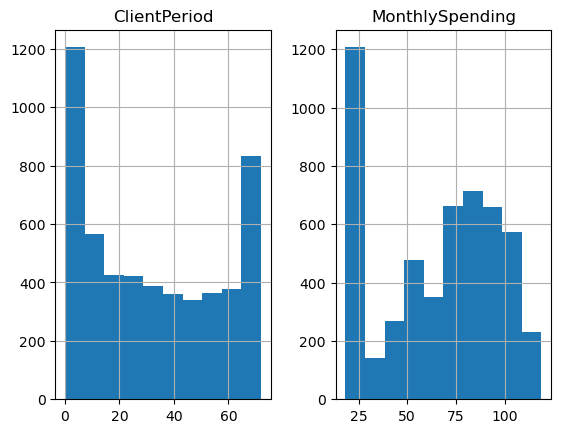

In [49]:
feat.hist() #гистограммы для численных признаков

In [57]:
kat = [f for f in df.columns if 'Has' in f]

In [65]:
#категориальные признаки
kategories = df[kat].assign(Sex = df['Sex'], IsSeniorCitizen = df['IsSeniorCitizen'],
                           IsBillingPaperless = df['IsBillingPaperless'], PaymentMethod = df['PaymentMethod'])

In [66]:
kategories.head()

,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,Sex,IsSeniorCitizen,IsBillingPaperless,PaymentMethod
0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Male,0,No,Mailed check
1,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Male,0,No,Credit card (automatic)
2,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Male,0,Yes,Electronic check
3,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Female,1,No,Mailed check
4,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Female,0,No,Credit card (automatic)


In [67]:
kategories.shape

(5282, 16)

In [70]:
y = df['Churn'] #Целевой признак

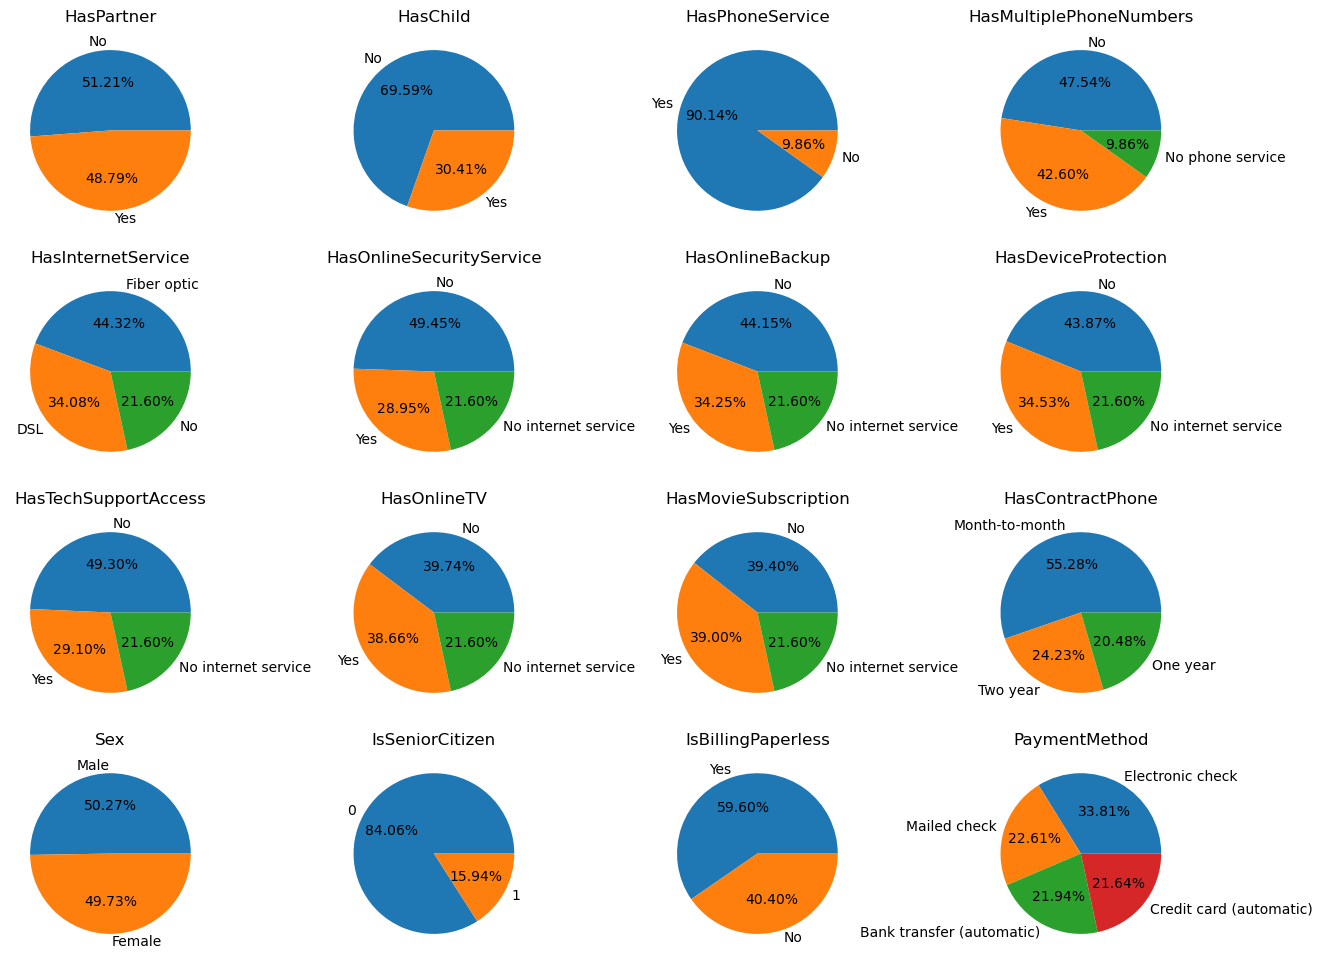

In [120]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(kategories.columns):
    plt.subplot(4, 4, i + 1)
    plt.pie(kategories[col].value_counts(), autopct = "%0.2f%%", labels = kategories[col].value_counts().keys())
    
    plt.title(col);

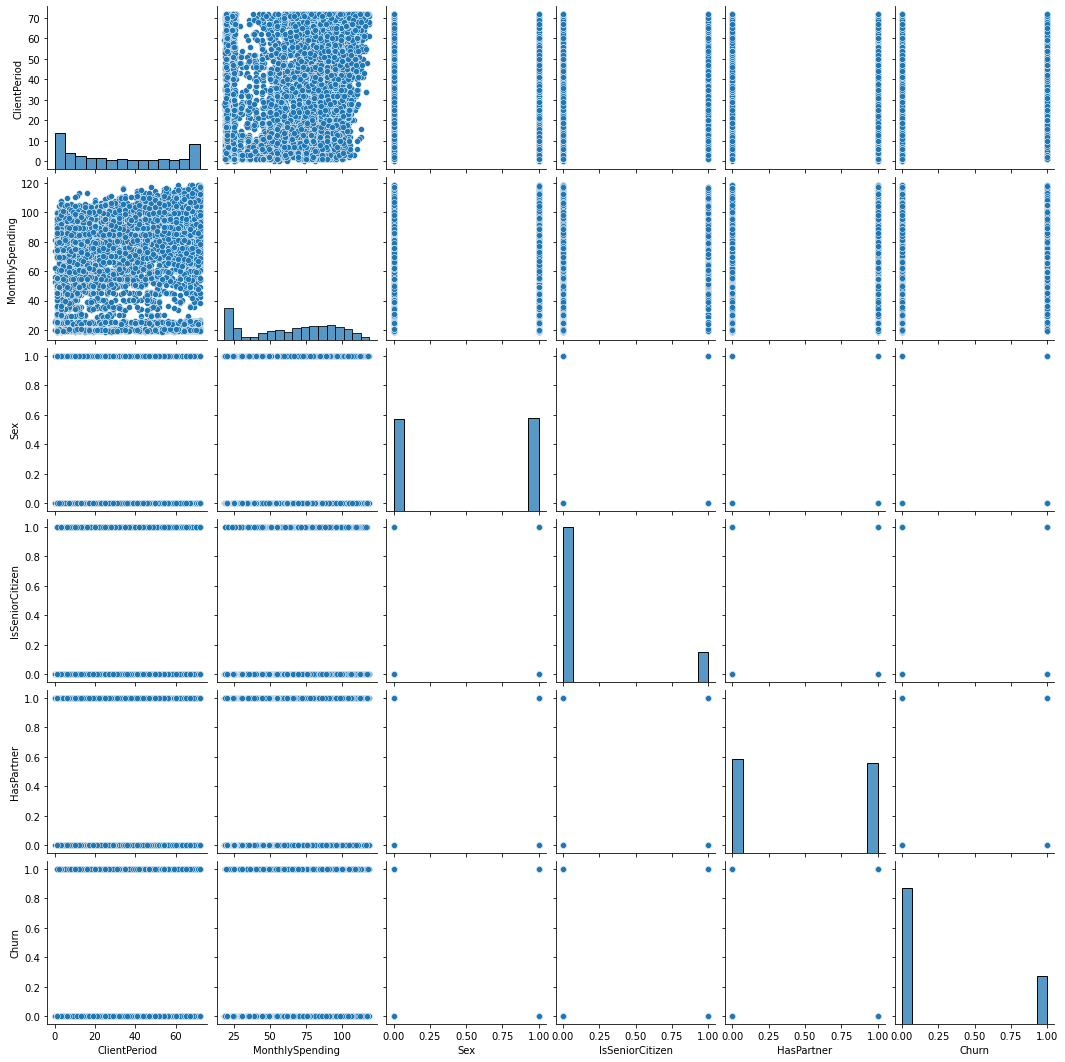

In [34]:
sns.pairplot(df) 

<AxesSubplot:>

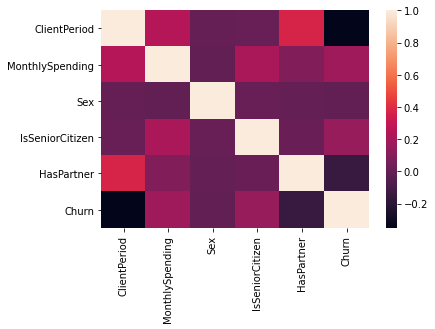

In [40]:
sns.heatmap(df.corr())

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (5 баллов)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С = [100, 10, 1, 0.1, 0.01, 0.001] по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scoring='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV.

In [90]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
#from sklearn.metrics import roc_auc_score, roc_curve
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV  

In [91]:
# наша целевая переменная
y = df['Churn']


X = df.drop('Churn', axis=1)

# индекс, по которому будем отделять обучающую выборку от тестовой
#idx_split = df.shape[0]

In [92]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [93]:
encoded_df=pd.get_dummies(X)
encoded_df.head()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,TotalSpent_,TotalSpent_100.2,TotalSpent_100.25,TotalSpent_100.35,TotalSpent_100.4,TotalSpent_100.9,TotalSpent_1001.5,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0


In [94]:
logit = LogisticRegression(n_jobs=-1, random_state=17)

In [97]:
logit.fit(encoded_df, y)#обучение на тренировочной выборке

LogisticRegression(n_jobs=-1, random_state=17)

In [98]:
logit.predict_proba(encoded_df[:1])

array([[0.98055457, 0.01944543]])

In [99]:
test_pred = logit.predict_proba(encoded_df)[:, 1]

In [100]:
test_pred.shape

(5282,)

In [124]:
import warnings
warnings.filterwarnings("ignore")

valid_pred = logit.predict_proba(encoded_df)[:, 1]

In [123]:
roc_auc_score(y, valid_pred)

0.858781608027831

In [101]:
С = [100, 10, 1, 0.1, 0.01, 0.001]


In [102]:
grid_values = { 'C': [100, 10, 1, 0.1, 0.01, 0.001]}

log_grid = GridSearchCV(logit, param_grid=grid_values, cv=5, n_jobs=-1, verbose=True) 

In [103]:
log_grid.fit(encoded_df, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=17),
             n_jobs=-1, param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             verbose=True)

In [104]:
log_grid.best_estimator_

LogisticRegression(C=0.1, n_jobs=-1, random_state=17)

LogisticRegression: ROC AUC=0.859


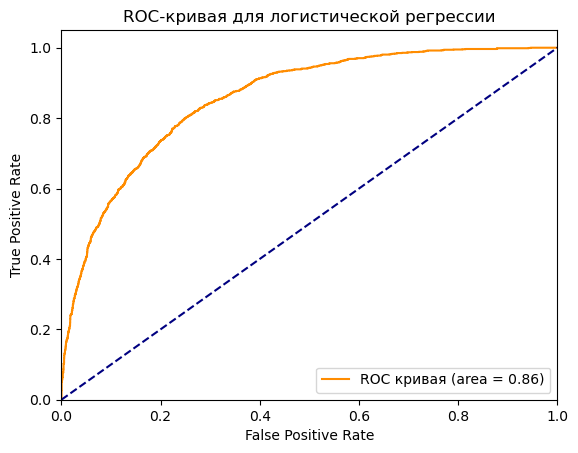

In [171]:
from sklearn.metrics import roc_curve, auc

lr_probs = log_grid.predict_proba(encoded_df)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y, valid_pred)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend(loc="lower right")
plt.show()

# Вторая часть. Предсказания (8 баллов)

In [106]:
df_test = pd.read_csv('test_churn.csv')

In [108]:
df_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [113]:
df_test.shape

(1761, 19)

In [111]:
encoded_df_test=pd.get_dummies(df_test)
encoded_df_test.head()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,TotalSpent_,TotalSpent_100.8,TotalSpent_1001.2,TotalSpent_1006.9,TotalSpent_1008.7,TotalSpent_101.45,TotalSpent_1011.05,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,42,56.10,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,29,98.50,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
2,9,76.25,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,67,74.00,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4,71,20.10,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0


In [114]:
encoded_df_test.shape

(1761, 1754)

In [127]:
logit.fit(encoded_df_test, y[0:encoded_df_test.shape[0]])

LogisticRegression(n_jobs=-1, random_state=17)

In [128]:
test_pred = logit.predict_proba(encoded_df_test)[:, 1]

In [130]:
roc_auc_score(y[0:encoded_df_test.shape[0]], test_pred)

0.881080829608615

In [131]:
pd.Series(np.round(test_pred, 2), index=range(1, test_pred.shape[0]+1),
         name='Churn').head().to_csv('Churn_pred.scv', header=True, index_label='Id')

##  Случайный лес

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [137]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17) #0.3 - доля тестовой выборки

In [138]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3697, 19), (1585, 19), (3697,), (1585,))

In [148]:
X_train_encoded = pd.get_dummies(X_train)
X_valid_encoded = pd.get_dummies(X_valid)

In [142]:
forest = RandomForestRegressor(random_state=17, n_estimators = 1000)

In [ ]:
forest.fit(X_train_encoded, y_train)

In [159]:
print('MSE=%f' % np.sqrt(mean_squared_error(y_train, 
                                 forest.predict(X_train_encoded))))

MSE=0.144529


In [158]:
coef=forest.feature_importances_ #для леса - важность признака

pd.DataFrame(forest.feature_importances_,  
             columns=['coef']).sort_values(by='coef', ascending=False)

,coef
3581,0.170400
0,0.105232
1,0.091435
3561,0.029278
3563,0.029157
...,...
1762,0.000000
1758,0.000000
1754,0.000000
1753,0.000000


In [161]:
np.mean(cross_val_score(forest, X_train_encoded, y_train, cv=5))

0.234490934218779

In [164]:
valid_forest_pred = forest.predict(X_train_encoded)

In [166]:
roc_auc_score(y_train,valid_forest_pred)

0.999999258901336

LogisticRegression: ROC AUC=1.000


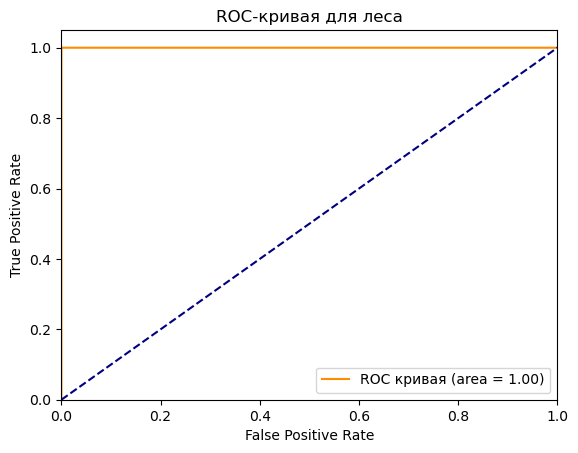

In [170]:
# сохраняем вероятности только для положительного исхода
lr_probs = valid_forest_pred
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_train,valid_forest_pred)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_train, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для леса')
plt.legend(loc="lower right")
plt.show()

## Градиентный бустинг 

In [172]:
from sklearn.ensemble import GradientBoostingClassifier

In [174]:
GBC = GradientBoostingClassifier(random_state=17)

In [175]:
GBC.fit(X_train_encoded, y_train)

GradientBoostingClassifier(random_state=17)

In [176]:
print('MSE=%f' % np.sqrt(mean_squared_error(y_train, 
                                 GBC.predict(X_train_encoded))))

MSE=0.431076


In [177]:
valid_GBC_pred = GBC.predict(X_train_encoded)

In [178]:
roc_auc_score(y_train, valid_GBC_pred)

0.721535511965779

LogisticRegression: ROC AUC=0.722


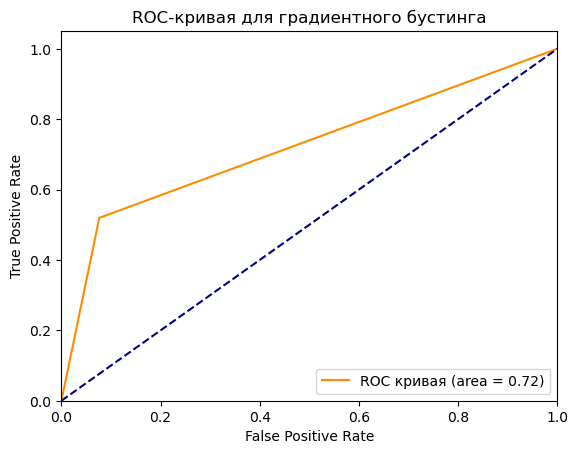

In [180]:
# сохраняем вероятности только для положительного исхода
lr_probs = valid_GBC_pred
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_train, valid_GBC_pred)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_train, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для градиентного бустинга')
plt.legend(loc="lower right")
plt.show()

## Cat Boost 

In [181]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [185]:
from catboost import Pool, cv
params = {"iterations": 100,
          "depth": 2,
          "loss_function": "RMSE",
          "verbose": False}
cv_dataset = Pool(data=encoded_df,
                  label=y)
scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]

bestTest = 0.3801863612
bestIteration = 99

Training on fold [1/2]

bestTest = 0.3659301724
bestIteration = 99



In [186]:
valid_cat_pred = cat.predict(encoded_df)

In [187]:
roc_auc_score(y, valid_cat_pred)

0.9039300945794049

LogisticRegression: ROC AUC=0.904


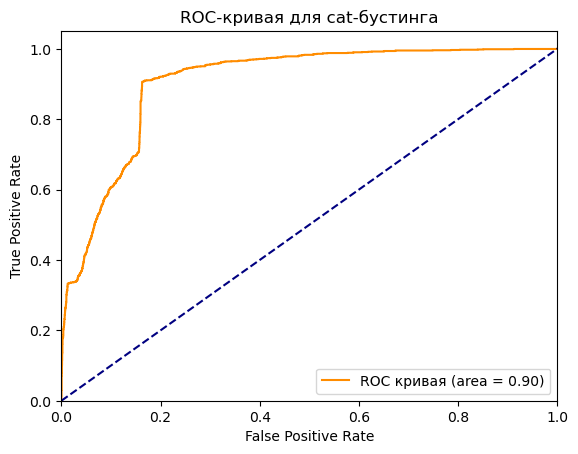

In [191]:
# сохраняем вероятности только для положительного исхода
lr_probs = valid_cat_pred
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y, valid_cat_pred)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для cat-бустинга')
plt.legend(loc="lower right")
plt.show()